In [32]:

import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import datetime
import os

path = "/Users/martin/Desktop/Cours/Advanced Computing techniques 2018/Exercices/Project/"
os.chdir(path)

import extra_function_date as func

filename = "results+WC2018.csv"
filename_woWC = "results_wo_WC2014.csv"
filename_WC ="result_2014_WC.csv"
filename_2018 ="data_WC2018.csv"
dtype = (object,4)

#read the 3 data set : 1: all games, 2:all games execpt 2014 World Cup, 3: only 2014 World cup
X = np.genfromtxt(path+ filename, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
X_woWC = np.genfromtxt(path+ filename_woWC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
X_WC = np.genfromtxt(path+ filename_WC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])

date_2018 = np.genfromtxt(path+ filename_2018, delimiter=",",dtype=(str,10), skip_header=1, encoding=None,usecols=[0])


n = len(X[:,0])
print(n)

print(X_woWC[0,:])
print(X_woWC[1,:])

#Encode the playing country 
le_country = LabelEncoder().fit(X[:,1])
X[:,0] = le_country.transform(X[:,0])
X_WC[:,0] = le_country.transform(X_WC[:,0])
X_woWC[:,0] = le_country.transform(X_woWC[:,0])

X[:,1] = le_country.transform(X[:,1])
X_WC[:,1] = le_country.transform(X_WC[:,1])
X_woWC[:,1] = le_country.transform(X_woWC[:,1])

#Encode the the rest : 
todo = [2,3]
for i in todo:
    le = LabelEncoder().fit(X[:,i])
    X[:,i] = le.transform(X[:,i])
    X_WC[:,i] = le.transform(X_WC[:,i])
    X_woWC[:,i] = le.transform(X_woWC[:,i])

# one = OneHotEncoder().fit(X[:,3:5])
# X[:,3:5] = one.transform(X[:,3:5])


one = OneHotEncoder(categorical_features = [0,1,2,3], sparse = False)
X = one.fit_transform(X)
X_WC = one.fit_transform(X_WC)
X_woWC = one.fit_transform(X_woWC)

print(np.shape(X))

#get the label: 
dtype = (int,2)
y = np.genfromtxt(path+ filename, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])
y_WC = np.genfromtxt(path+ filename_WC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])
y_woWC = np.genfromtxt(path+ filename_woWC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])

def get_label(y):
    label = y[:,0]-y[:,1]    
    label_classifier =[]
    
    for i,x in enumerate(label):
        if x > 0 : 
            label_classifier.append(0) #home win 
        elif x == 0:
            label_classifier.append(1)# draw
        else:
            label_classifier.append(2)#away win 
    return label_classifier
        
# label_classifier = np.asarray(label_classifier).reshape(-1, 1)
# print (label_classifier)

label_classifier = np.asarray(get_label(y))
label_classifier_WC = np.asarray(get_label(y_WC))
label_classifier_woWC = np.asarray(get_label(y_woWC))

one_hot_lab = OneHotEncoder(categorical_features = [0], sparse = False)
label_classifier = one_hot_lab.fit_transform(label_classifier.reshape(-1,1))

label_classifier = label_classifier[:-48,:]
X_2018 = X[-48:,:]
X = X[:-48,:]

print(np.shape(label_classifier))

print(label_classifier)

print(np.shape(X_2018))
print(np.shape(X))

reduced_X = X[22227:]
label_reduced = label_classifier[22227:]

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, label_classifier, train_size = 0.8)
X_train_red, X_validation_red, y_train_red, y_validation_red = train_test_split(reduced_X, label_reduced, train_size = 0.8)



38973
[b'Scotland' b'England' b'Friendly' b'FALSE']
[b'England' b'Scotland' b'Friendly' b'FALSE']


(38973, 579)


(38925, 3)
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
(48, 579)
(38925, 579)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
#buid the neural network :

from keras.models import Model
from keras.layers import Input, Dense, Activation

print(np.shape(X_train))

inputs = Input(shape=(579,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(10)(inputs)
x = Activation('tanh')(x)
# x = Dense(5)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
x = Dense(3, activation='softmax')(x)
# to find out more about activations check the keras documentation

mod1 = Model(inputs=inputs, outputs=x)
mod2 = Model(inputs=inputs, outputs=x)

mod1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mod2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mod1.summary()

(31140, 579)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 579)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5800      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 33        
Total params: 5,833
Trainable params: 5,833
Non-trainable params: 0
_________________________________________________________________


In [34]:
h1 = mod1.fit(X_train, y_train,batch_size=128,
                               epochs=15, 
                               verbose=1,validation_data=(X_validation, y_validation))
h2 = mod2.fit(X_train_red, y_train_red,batch_size=128,
                               epochs=15, 
                               verbose=1,validation_data=(X_validation_red, y_validation_red))


Train on 31140 samples, validate on 7785 samples
Epoch 1/15


  128/31140 [..............................] - ETA: 1:22 - loss: 1.1130 - acc: 0.3047

 2176/31140 [=>............................] - ETA: 5s - loss: 1.0966 - acc: 0.3631  

 4864/31140 [===>..........................] - ETA: 2s - loss: 1.0775 - acc: 0.4245

 7936/31140 [======>.......................] - ETA: 1s - loss: 1.0658 - acc: 0.4486

11136/31140 [=========>....................] - ETA: 0s - loss: 1.0595 - acc: 0.4564

14464/31140 [============>.................] - ETA: 0s - loss: 1.0503 - acc: 0.4662

17664/31140 [================>.............] - ETA: 0s - loss: 1.0463 - acc: 0.4701

20992/31140 [===================>..........] - ETA: 0s - loss: 1.0429 - acc: 0.4728

24320/31140 [======================>.......] - ETA: 0s - loss: 1.0378 - acc: 0.4780

27648/31140 [=========================>....] - ETA: 0s - loss: 1.0347 - acc: 0.4811

30336/31140 [============================>.] - ETA: 0s - loss: 1.0315 - acc: 0.4851

31140/31140 [==============================] - 1s 32us/step - loss: 1.0305 - acc: 0.4864 - val_loss: 0.9976 - val_acc: 0.5160


Epoch 2/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9606 - acc: 0.5547

 2432/31140 [=>............................] - ETA: 0s - loss: 0.9745 - acc: 0.5395

 3968/31140 [==>...........................] - ETA: 0s - loss: 0.9768 - acc: 0.5350

 6528/31140 [=====>........................] - ETA: 0s - loss: 0.9807 - acc: 0.5325

 9472/31140 [========>.....................] - ETA: 0s - loss: 0.9831 - acc: 0.5290

12544/31140 [===========>..................] - ETA: 0s - loss: 0.9819 - acc: 0.5301

15616/31140 [==============>...............] - ETA: 0s - loss: 0.9788 - acc: 0.5330

18688/31140 [=================>............] - ETA: 0s - loss: 0.9764 - acc: 0.5345

21760/31140 [===================>..........] - ETA: 0s - loss: 0.9741 - acc: 0.5369

24704/31140 [======================>.......] - ETA: 0s - loss: 0.9718 - acc: 0.5382

27776/31140 [=========================>....] - ETA: 0s - loss: 0.9697 - acc: 0.5408

30848/31140 [============================>.] - ETA: 0s - loss: 0.9692 - acc: 0.5411

31140/31140 [==============================] - 1s 20us/step - loss: 0.9693 - acc: 0.5409 - val_loss: 0.9570 - val_acc: 0.5494


Epoch 3/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9449 - acc: 0.5703

 2816/31140 [=>............................] - ETA: 0s - loss: 0.9337 - acc: 0.5682

 5376/31140 [====>.........................] - ETA: 0s - loss: 0.9313 - acc: 0.5694

 7552/31140 [======>.......................] - ETA: 0s - loss: 0.9348 - acc: 0.5654

10624/31140 [=========>....................] - ETA: 0s - loss: 0.9330 - acc: 0.5665

13568/31140 [============>.................] - ETA: 0s - loss: 0.9375 - acc: 0.5612

16512/31140 [==============>...............] - ETA: 0s - loss: 0.9359 - acc: 0.5639

19456/31140 [=================>............] - ETA: 0s - loss: 0.9379 - acc: 0.5616

22528/31140 [====================>.........] - ETA: 0s - loss: 0.9373 - acc: 0.5629

25600/31140 [=======================>......] - ETA: 0s - loss: 0.9368 - acc: 0.5623

28672/31140 [==========================>...] - ETA: 0s - loss: 0.9362 - acc: 0.5629

31140/31140 [==============================] - 1s 20us/step - loss: 0.9367 - acc: 0.5622 - val_loss: 0.9392 - val_acc: 0.5640


Epoch 4/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9940 - acc: 0.5156

 2688/31140 [=>............................] - ETA: 0s - loss: 0.9351 - acc: 0.5554

 5248/31140 [====>.........................] - ETA: 0s - loss: 0.9365 - acc: 0.5556

 7424/31140 [======>.......................] - ETA: 0s - loss: 0.9257 - acc: 0.5641

10496/31140 [=========>....................] - ETA: 0s - loss: 0.9202 - acc: 0.5693

13440/31140 [===========>..................] - ETA: 0s - loss: 0.9253 - acc: 0.5656

16640/31140 [===============>..............] - ETA: 0s - loss: 0.9232 - acc: 0.5684

19712/31140 [=================>............] - ETA: 0s - loss: 0.9225 - acc: 0.5676

22784/31140 [====================>.........] - ETA: 0s - loss: 0.9232 - acc: 0.5672

25856/31140 [=======================>......] - ETA: 0s - loss: 0.9243 - acc: 0.5676

29056/31140 [==========================>...] - ETA: 0s - loss: 0.9230 - acc: 0.5690

31140/31140 [==============================] - 1s 19us/step - loss: 0.9211 - acc: 0.5707 - val_loss: 0.9313 - val_acc: 0.5676


Epoch 5/15
  128/31140 [..............................] - ETA: 0s - loss: 0.8942 - acc: 0.6094

 2816/31140 [=>............................] - ETA: 0s - loss: 0.9106 - acc: 0.5760

 5376/31140 [====>.........................] - ETA: 0s - loss: 0.9053 - acc: 0.5796

 7424/31140 [======>.......................] - ETA: 0s - loss: 0.9102 - acc: 0.5780

10368/31140 [========>.....................] - ETA: 0s - loss: 0.9123 - acc: 0.5783

13312/31140 [===========>..................] - ETA: 0s - loss: 0.9135 - acc: 0.5768

16512/31140 [==============>...............] - ETA: 0s - loss: 0.9123 - acc: 0.5771

19712/31140 [=================>............] - ETA: 0s - loss: 0.9150 - acc: 0.5737

22912/31140 [=====================>........] - ETA: 0s - loss: 0.9141 - acc: 0.5744

25856/31140 [=======================>......] - ETA: 0s - loss: 0.9134 - acc: 0.5748

28928/31140 [==========================>...] - ETA: 0s - loss: 0.9130 - acc: 0.5756

31140/31140 [==============================] - 1s 20us/step - loss: 0.9126 - acc: 0.5754 - val_loss: 0.9274 - val_acc: 0.5657


Epoch 6/15


  128/31140 [..............................] - ETA: 0s - loss: 0.8765 - acc: 0.6094

 2816/31140 [=>............................] - ETA: 0s - loss: 0.8981 - acc: 0.5902

 5504/31140 [====>.........................] - ETA: 0s - loss: 0.9059 - acc: 0.5828

 7552/31140 [======>.......................] - ETA: 0s - loss: 0.9072 - acc: 0.5791

10624/31140 [=========>....................] - ETA: 0s - loss: 0.9086 - acc: 0.5765

13952/31140 [============>.................] - ETA: 0s - loss: 0.9072 - acc: 0.5781

17152/31140 [===============>..............] - ETA: 0s - loss: 0.9067 - acc: 0.5792

20480/31140 [==================>...........] - ETA: 0s - loss: 0.9072 - acc: 0.5789

23808/31140 [=====================>........] - ETA: 0s - loss: 0.9069 - acc: 0.5788

27136/31140 [=========================>....] - ETA: 0s - loss: 0.9065 - acc: 0.5788

30336/31140 [============================>.] - ETA: 0s - loss: 0.9069 - acc: 0.5781

31140/31140 [==============================] - 1s 19us/step - loss: 0.9074 - acc: 0.5777 - val_loss: 0.9245 - val_acc: 0.5672


Epoch 7/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9294 - acc: 0.5234

 3200/31140 [==>...........................] - ETA: 0s - loss: 0.8958 - acc: 0.5844

 6272/31140 [=====>........................] - ETA: 0s - loss: 0.8897 - acc: 0.5853

 9088/31140 [=======>......................] - ETA: 0s - loss: 0.8986 - acc: 0.5793

11392/31140 [=========>....................] - ETA: 0s - loss: 0.9020 - acc: 0.5788

14080/31140 [============>.................] - ETA: 0s - loss: 0.9032 - acc: 0.5807

16512/31140 [==============>...............] - ETA: 0s - loss: 0.9008 - acc: 0.5819

18816/31140 [=================>............] - ETA: 0s - loss: 0.9005 - acc: 0.5816

20736/31140 [==================>...........] - ETA: 0s - loss: 0.9022 - acc: 0.5801

22656/31140 [====================>.........] - ETA: 0s - loss: 0.9024 - acc: 0.5801

24704/31140 [======================>.......] - ETA: 0s - loss: 0.9025 - acc: 0.5794

26752/31140 [========================>.....] - ETA: 0s - loss: 0.9020 - acc: 0.5798

28544/31140 [==========================>...] - ETA: 0s - loss: 0.9022 - acc: 0.5804

30336/31140 [============================>.] - ETA: 0s - loss: 0.9031 - acc: 0.5804

31140/31140 [==============================] - 1s 25us/step - loss: 0.9039 - acc: 0.5800 - val_loss: 0.9222 - val_acc: 0.5710


Epoch 8/15
  128/31140 [..............................] - ETA: 0s - loss: 0.8947 - acc: 0.5859

 1920/31140 [>.............................] - ETA: 0s - loss: 0.8976 - acc: 0.5792

 3584/31140 [==>...........................] - ETA: 0s - loss: 0.9032 - acc: 0.5739

 5376/31140 [====>.........................] - ETA: 0s - loss: 0.8964 - acc: 0.5783

 7296/31140 [======>.......................] - ETA: 0s - loss: 0.8952 - acc: 0.5809

 9344/31140 [========>.....................] - ETA: 0s - loss: 0.8976 - acc: 0.5789

12288/31140 [==========>...................] - ETA: 0s - loss: 0.8963 - acc: 0.5807

15360/31140 [=============>................] - ETA: 0s - loss: 0.8985 - acc: 0.5800

18432/31140 [================>.............] - ETA: 0s - loss: 0.8985 - acc: 0.5809

21248/31140 [===================>..........] - ETA: 0s - loss: 0.8969 - acc: 0.5820

24320/31140 [======================>.......] - ETA: 0s - loss: 0.8981 - acc: 0.5818

27392/31140 [=========================>....] - ETA: 0s - loss: 0.8996 - acc: 0.5806

30592/31140 [============================>.] - ETA: 0s - loss: 0.9005 - acc: 0.5803

31140/31140 [==============================] - 1s 22us/step - loss: 0.9011 - acc: 0.5801 - val_loss: 0.9204 - val_acc: 0.5698


Epoch 9/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9285 - acc: 0.6328

 2560/31140 [=>............................] - ETA: 0s - loss: 0.8841 - acc: 0.6035

 4608/31140 [===>..........................] - ETA: 0s - loss: 0.8863 - acc: 0.5957

 7424/31140 [======>.......................] - ETA: 0s - loss: 0.8960 - acc: 0.5858

10496/31140 [=========>....................] - ETA: 0s - loss: 0.9002 - acc: 0.5828

13568/31140 [============>.................] - ETA: 0s - loss: 0.9006 - acc: 0.5822

16640/31140 [===============>..............] - ETA: 0s - loss: 0.8987 - acc: 0.5828

19840/31140 [==================>...........] - ETA: 0s - loss: 0.8992 - acc: 0.5830

22912/31140 [=====================>........] - ETA: 0s - loss: 0.8991 - acc: 0.5809

25984/31140 [========================>.....] - ETA: 0s - loss: 0.8994 - acc: 0.5819

29056/31140 [==========================>...] - ETA: 0s - loss: 0.8999 - acc: 0.5814

31140/31140 [==============================] - 1s 21us/step - loss: 0.8996 - acc: 0.5820 - val_loss: 0.9203 - val_acc: 0.5672


Epoch 10/15
  128/31140 [..............................] - ETA: 1s - loss: 0.8789 - acc: 0.6094

 2432/31140 [=>............................] - ETA: 0s - loss: 0.9035 - acc: 0.5769

 4352/31140 [===>..........................] - ETA: 0s - loss: 0.8989 - acc: 0.5763

 7040/31140 [=====>........................] - ETA: 0s - loss: 0.9040 - acc: 0.5771

10112/31140 [========>.....................] - ETA: 0s - loss: 0.9021 - acc: 0.5797

13312/31140 [===========>..................] - ETA: 0s - loss: 0.8982 - acc: 0.5814

16384/31140 [==============>...............] - ETA: 0s - loss: 0.8990 - acc: 0.5798

19584/31140 [=================>............] - ETA: 0s - loss: 0.8995 - acc: 0.5790

22784/31140 [====================>.........] - ETA: 0s - loss: 0.8983 - acc: 0.5796

25984/31140 [========================>.....] - ETA: 0s - loss: 0.8978 - acc: 0.5810

28928/31140 [==========================>...] - ETA: 0s - loss: 0.8975 - acc: 0.5817

31140/31140 [==============================] - 1s 19us/step - loss: 0.8979 - acc: 0.5817 - val_loss: 0.9203 - val_acc: 0.5697


Epoch 11/15
  128/31140 [..............................] - ETA: 0s - loss: 1.0127 - acc: 0.5625

 2688/31140 [=>............................] - ETA: 0s - loss: 0.8876 - acc: 0.5971

 4736/31140 [===>..........................] - ETA: 0s - loss: 0.8858 - acc: 0.5944

 7168/31140 [=====>........................] - ETA: 0s - loss: 0.8910 - acc: 0.5908

10112/31140 [========>.....................] - ETA: 0s - loss: 0.8866 - acc: 0.5903

12928/31140 [===========>..................] - ETA: 0s - loss: 0.8869 - acc: 0.5896

15872/31140 [==============>...............] - ETA: 0s - loss: 0.8925 - acc: 0.5849

19072/31140 [=================>............] - ETA: 0s - loss: 0.8932 - acc: 0.5844

22272/31140 [====================>.........] - ETA: 0s - loss: 0.8940 - acc: 0.5845

25472/31140 [=======================>......] - ETA: 0s - loss: 0.8960 - acc: 0.5838

28672/31140 [==========================>...] - ETA: 0s - loss: 0.8970 - acc: 0.5835

31140/31140 [==============================] - 1s 20us/step - loss: 0.8973 - acc: 0.5827 - val_loss: 0.9183 - val_acc: 0.5690


Epoch 12/15
  128/31140 [..............................] - ETA: 0s - loss: 0.8657 - acc: 0.6094

 2816/31140 [=>............................] - ETA: 0s - loss: 0.8834 - acc: 0.5835

 4736/31140 [===>..........................] - ETA: 0s - loss: 0.8834 - acc: 0.5925

 7424/31140 [======>.......................] - ETA: 0s - loss: 0.8837 - acc: 0.5904

10496/31140 [=========>....................] - ETA: 0s - loss: 0.8881 - acc: 0.5877

13696/31140 [============>.................] - ETA: 0s - loss: 0.8879 - acc: 0.5876

16896/31140 [===============>..............] - ETA: 0s - loss: 0.8912 - acc: 0.5871

20096/31140 [==================>...........] - ETA: 0s - loss: 0.8938 - acc: 0.5840

23296/31140 [=====================>........] - ETA: 0s - loss: 0.8945 - acc: 0.5837

26368/31140 [========================>.....] - ETA: 0s - loss: 0.8962 - acc: 0.5836

29440/31140 [===========================>..] - ETA: 0s - loss: 0.8966 - acc: 0.5835

31140/31140 [==============================] - 1s 19us/step - loss: 0.8961 - acc: 0.5836 - val_loss: 0.9184 - val_acc: 0.5710


Epoch 13/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9015 - acc: 0.5469

 2688/31140 [=>............................] - ETA: 0s - loss: 0.8878 - acc: 0.5774

 4480/31140 [===>..........................] - ETA: 0s - loss: 0.8907 - acc: 0.5830

 7040/31140 [=====>........................] - ETA: 0s - loss: 0.8935 - acc: 0.5852

10112/31140 [========>.....................] - ETA: 0s - loss: 0.8914 - acc: 0.5843

13184/31140 [===========>..................] - ETA: 0s - loss: 0.8914 - acc: 0.5850

16256/31140 [==============>...............] - ETA: 0s - loss: 0.8932 - acc: 0.5826

19328/31140 [=================>............] - ETA: 0s - loss: 0.8937 - acc: 0.5826

22400/31140 [====================>.........] - ETA: 0s - loss: 0.8917 - acc: 0.5837

25344/31140 [=======================>......] - ETA: 0s - loss: 0.8934 - acc: 0.5828

28160/31140 [==========================>...] - ETA: 0s - loss: 0.8946 - acc: 0.5832

31140/31140 [==============================] - 1s 20us/step - loss: 0.8955 - acc: 0.5826 - val_loss: 0.9194 - val_acc: 0.5717


Epoch 14/15
  128/31140 [..............................] - ETA: 0s - loss: 0.9872 - acc: 0.4688

 2560/31140 [=>............................] - ETA: 0s - loss: 0.8994 - acc: 0.5727

 4608/31140 [===>..........................] - ETA: 0s - loss: 0.9030 - acc: 0.5718

 7552/31140 [======>.......................] - ETA: 0s - loss: 0.8955 - acc: 0.5824

10624/31140 [=========>....................] - ETA: 0s - loss: 0.8892 - acc: 0.5894

13696/31140 [============>.................] - ETA: 0s - loss: 0.8873 - acc: 0.5919

16768/31140 [===============>..............] - ETA: 0s - loss: 0.8888 - acc: 0.5897

19840/31140 [==================>...........] - ETA: 0s - loss: 0.8916 - acc: 0.5872

22784/31140 [====================>.........] - ETA: 0s - loss: 0.8932 - acc: 0.5857

25600/31140 [=======================>......] - ETA: 0s - loss: 0.8935 - acc: 0.5855

28672/31140 [==========================>...] - ETA: 0s - loss: 0.8939 - acc: 0.5856

31140/31140 [==============================] - 1s 19us/step - loss: 0.8949 - acc: 0.5845 - val_loss: 0.9205 - val_acc: 0.5701


Epoch 15/15
  128/31140 [..............................] - ETA: 0s - loss: 0.8675 - acc: 0.6172

 2688/31140 [=>............................] - ETA: 0s - loss: 0.8903 - acc: 0.5878

 4736/31140 [===>..........................] - ETA: 0s - loss: 0.8930 - acc: 0.5845

 7808/31140 [======>.......................] - ETA: 0s - loss: 0.8874 - acc: 0.5857

10880/31140 [=========>....................] - ETA: 0s - loss: 0.8857 - acc: 0.5878

13952/31140 [============>.................] - ETA: 0s - loss: 0.8857 - acc: 0.5887

17024/31140 [===============>..............] - ETA: 0s - loss: 0.8894 - acc: 0.5858

19968/31140 [==================>...........] - ETA: 0s - loss: 0.8928 - acc: 0.5832

23040/31140 [=====================>........] - ETA: 0s - loss: 0.8917 - acc: 0.5844

26112/31140 [========================>.....] - ETA: 0s - loss: 0.8932 - acc: 0.5840

29184/31140 [===========================>..] - ETA: 0s - loss: 0.8937 - acc: 0.5850

31140/31140 [==============================] - 1s 19us/step - loss: 0.8944 - acc: 0.5849 - val_loss: 0.9182 - val_acc: 0.5719


Train on 13358 samples, validate on 3340 samples
Epoch 1/15


  128/13358 [..............................] - ETA: 22s - loss: 0.8457 - acc: 0.6328

 2688/13358 [=====>........................] - ETA: 1s - loss: 0.8898 - acc: 0.5815 

 4864/13358 [=========>....................] - ETA: 0s - loss: 0.8868 - acc: 0.5835

 7296/13358 [===============>..............] - ETA: 0s - loss: 0.8743 - acc: 0.5905

10112/13358 [=====================>........] - ETA: 0s - loss: 0.8767 - acc: 0.5893

13056/13358 [============================>.] - ETA: 0s - loss: 0.8743 - acc: 0.5933

13358/13358 [==============================] - 1s 42us/step - loss: 0.8741 - acc: 0.5934 - val_loss: 0.8698 - val_acc: 0.5874


Epoch 2/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8785 - acc: 0.5859

 2176/13358 [===>..........................] - ETA: 0s - loss: 0.8558 - acc: 0.5983

 4096/13358 [========>.....................] - ETA: 0s - loss: 0.8560 - acc: 0.6035

 6016/13358 [============>.................] - ETA: 0s - loss: 0.8593 - acc: 0.6004

 7936/13358 [================>.............] - ETA: 0s - loss: 0.8600 - acc: 0.5973

 9728/13358 [====================>.........] - ETA: 0s - loss: 0.8591 - acc: 0.5981

11648/13358 [=========================>....] - ETA: 0s - loss: 0.8590 - acc: 0.5986

13358/13358 [==============================] - 0s 32us/step - loss: 0.8610 - acc: 0.5993 - val_loss: 0.8684 - val_acc: 0.5913


Epoch 3/15
  128/13358 [..............................] - ETA: 0s - loss: 0.7513 - acc: 0.6797

 1920/13358 [===>..........................] - ETA: 0s - loss: 0.8319 - acc: 0.6266

 3840/13358 [=======>......................] - ETA: 0s - loss: 0.8414 - acc: 0.6258

 5760/13358 [===========>..................] - ETA: 0s - loss: 0.8460 - acc: 0.6191

 7680/13358 [================>.............] - ETA: 0s - loss: 0.8499 - acc: 0.6146

10496/13358 [======================>.......] - ETA: 0s - loss: 0.8519 - acc: 0.6094

13358/13358 [==============================] - 0s 25us/step - loss: 0.8545 - acc: 0.6062 - val_loss: 0.8710 - val_acc: 0.5901


Epoch 4/15
  128/13358 [..............................] - ETA: 0s - loss: 0.7660 - acc: 0.6250

 1920/13358 [===>..........................] - ETA: 0s - loss: 0.8513 - acc: 0.6000

 4096/13358 [========>.....................] - ETA: 0s - loss: 0.8515 - acc: 0.6094

 6912/13358 [==============>...............] - ETA: 0s - loss: 0.8481 - acc: 0.6107

 9728/13358 [====================>.........] - ETA: 0s - loss: 0.8475 - acc: 0.6089

12672/13358 [===========================>..] - ETA: 0s - loss: 0.8507 - acc: 0.6068

13358/13358 [==============================] - 0s 23us/step - loss: 0.8513 - acc: 0.6065 - val_loss: 0.8718 - val_acc: 0.5877


Epoch 5/15
  128/13358 [..............................] - ETA: 0s - loss: 0.9111 - acc: 0.5469

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8449 - acc: 0.6098

 4864/13358 [=========>....................] - ETA: 0s - loss: 0.8524 - acc: 0.6044

 7808/13358 [================>.............] - ETA: 0s - loss: 0.8453 - acc: 0.6095

10752/13358 [=======================>......] - ETA: 0s - loss: 0.8455 - acc: 0.6088

13358/13358 [==============================] - 0s 21us/step - loss: 0.8486 - acc: 0.6071 - val_loss: 0.8752 - val_acc: 0.5880


Epoch 6/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8372 - acc: 0.6484

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8626 - acc: 0.5951

 4608/13358 [=========>....................] - ETA: 0s - loss: 0.8394 - acc: 0.6157

 6528/13358 [=============>................] - ETA: 0s - loss: 0.8422 - acc: 0.6143

 9088/13358 [===================>..........] - ETA: 0s - loss: 0.8473 - acc: 0.6106

12032/13358 [==========================>...] - ETA: 0s - loss: 0.8473 - acc: 0.6090

13358/13358 [==============================] - 0s 24us/step - loss: 0.8468 - acc: 0.6089 - val_loss: 0.8767 - val_acc: 0.5904


Epoch 7/15
  128/13358 [..............................] - ETA: 0s - loss: 0.7924 - acc: 0.6641

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8590 - acc: 0.5972

 4224/13358 [========>.....................] - ETA: 0s - loss: 0.8560 - acc: 0.6009

 6784/13358 [==============>...............] - ETA: 0s - loss: 0.8490 - acc: 0.6066

 9600/13358 [====================>.........] - ETA: 0s - loss: 0.8460 - acc: 0.6119

12544/13358 [===========================>..] - ETA: 0s - loss: 0.8437 - acc: 0.6123

13358/13358 [==============================] - 0s 23us/step - loss: 0.8456 - acc: 0.6097 - val_loss: 0.8774 - val_acc: 0.5877


Epoch 8/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8703 - acc: 0.6094

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8596 - acc: 0.5977

 4352/13358 [========>.....................] - ETA: 0s - loss: 0.8527 - acc: 0.6023

 6400/13358 [=============>................] - ETA: 0s - loss: 0.8458 - acc: 0.6080

 9216/13358 [===================>..........] - ETA: 0s - loss: 0.8422 - acc: 0.6113

12160/13358 [==========================>...] - ETA: 0s - loss: 0.8416 - acc: 0.6116

13358/13358 [==============================] - 0s 23us/step - loss: 0.8441 - acc: 0.6099 - val_loss: 0.8797 - val_acc: 0.5877


Epoch 9/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8206 - acc: 0.6406

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8163 - acc: 0.6220

 4352/13358 [========>.....................] - ETA: 0s - loss: 0.8422 - acc: 0.6098

 6912/13358 [==============>...............] - ETA: 0s - loss: 0.8435 - acc: 0.6098

 9728/13358 [====================>.........] - ETA: 0s - loss: 0.8396 - acc: 0.6128

12672/13358 [===========================>..] - ETA: 0s - loss: 0.8423 - acc: 0.6110

13358/13358 [==============================] - 0s 23us/step - loss: 0.8436 - acc: 0.6097 - val_loss: 0.8817 - val_acc: 0.5871


Epoch 10/15


  128/13358 [..............................] - ETA: 0s - loss: 0.7775 - acc: 0.6641

 2432/13358 [====>.........................] - ETA: 0s - loss: 0.8153 - acc: 0.6357

 4480/13358 [=========>....................] - ETA: 0s - loss: 0.8254 - acc: 0.6219

 7168/13358 [===============>..............] - ETA: 0s - loss: 0.8372 - acc: 0.6150

 9984/13358 [=====================>........] - ETA: 0s - loss: 0.8356 - acc: 0.6160

12928/13358 [============================>.] - ETA: 0s - loss: 0.8412 - acc: 0.6115

13358/13358 [==============================] - 0s 23us/step - loss: 0.8429 - acc: 0.6109 - val_loss: 0.8822 - val_acc: 0.5868


Epoch 11/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8547 - acc: 0.6406

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8521 - acc: 0.6098

 4224/13358 [========>.....................] - ETA: 0s - loss: 0.8432 - acc: 0.6136

 6400/13358 [=============>................] - ETA: 0s - loss: 0.8375 - acc: 0.6167

 9216/13358 [===================>..........] - ETA: 0s - loss: 0.8400 - acc: 0.6153

12160/13358 [==========================>...] - ETA: 0s - loss: 0.8413 - acc: 0.6132

13358/13358 [==============================] - 0s 23us/step - loss: 0.8422 - acc: 0.6115 - val_loss: 0.8839 - val_acc: 0.5874


Epoch 12/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8291 - acc: 0.6172

 2176/13358 [===>..........................] - ETA: 0s - loss: 0.8347 - acc: 0.6117

 4096/13358 [========>.....................] - ETA: 0s - loss: 0.8355 - acc: 0.6123

 6656/13358 [=============>................] - ETA: 0s - loss: 0.8332 - acc: 0.6133

 9344/13358 [===================>..........] - ETA: 0s - loss: 0.8361 - acc: 0.6138

12032/13358 [==========================>...] - ETA: 0s - loss: 0.8396 - acc: 0.6120

13358/13358 [==============================] - 0s 23us/step - loss: 0.8419 - acc: 0.6113 - val_loss: 0.8855 - val_acc: 0.5853


Epoch 13/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8640 - acc: 0.5938

 2432/13358 [====>.........................] - ETA: 0s - loss: 0.8408 - acc: 0.6114

 4480/13358 [=========>....................] - ETA: 0s - loss: 0.8509 - acc: 0.6033

 6656/13358 [=============>................] - ETA: 0s - loss: 0.8445 - acc: 0.6061

 9344/13358 [===================>..........] - ETA: 0s - loss: 0.8419 - acc: 0.6091

12160/13358 [==========================>...] - ETA: 0s - loss: 0.8423 - acc: 0.6099

13358/13358 [==============================] - 0s 23us/step - loss: 0.8410 - acc: 0.6110 - val_loss: 0.8859 - val_acc: 0.5829


Epoch 14/15
  128/13358 [..............................] - ETA: 0s - loss: 0.8598 - acc: 0.6172

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8485 - acc: 0.6007

 4352/13358 [========>.....................] - ETA: 0s - loss: 0.8368 - acc: 0.6126

 7040/13358 [==============>...............] - ETA: 0s - loss: 0.8409 - acc: 0.6129

 9728/13358 [====================>.........] - ETA: 0s - loss: 0.8407 - acc: 0.6143

12672/13358 [===========================>..] - ETA: 0s - loss: 0.8418 - acc: 0.6132

13358/13358 [==============================] - 0s 23us/step - loss: 0.8409 - acc: 0.6145 - val_loss: 0.8866 - val_acc: 0.5856


Epoch 15/15


  128/13358 [..............................] - ETA: 0s - loss: 0.7897 - acc: 0.6406

 2304/13358 [====>.........................] - ETA: 0s - loss: 0.8179 - acc: 0.6298

 4480/13358 [=========>....................] - ETA: 0s - loss: 0.8290 - acc: 0.6225

 6528/13358 [=============>................] - ETA: 0s - loss: 0.8359 - acc: 0.6184

 9344/13358 [===================>..........] - ETA: 0s - loss: 0.8423 - acc: 0.6101

11904/13358 [=========================>....] - ETA: 0s - loss: 0.8416 - acc: 0.6109

13358/13358 [==============================] - 0s 24us/step - loss: 0.8405 - acc: 0.6102 - val_loss: 0.8871 - val_acc: 0.5844


In [43]:
#prediction : 
score1 = mod1.evaluate(X_validation, y_validation, batch_size=128)
score2 = mod2.evaluate(X_validation_red, y_validation_red, batch_size=128)
print("Loss and Accuracy, all data : ", score1)
print("Loss and Accuracy, data after 2000 : ", score2)

 128/7785 [..............................] - ETA: 0s

4864/7785 [=================>............] - ETA: 0s

7785/7785 [==============================] - 0s 11us/step


 128/3340 [>.............................] - ETA: 0s

3340/3340 [==============================] - 0s 11us/step


Loss and Accuracy, all data :  [0.9346598901347465, 0.5599229287128841]
Loss and Accuracy, data after 2000 :  [0.8870855796836807, 0.5844311377245509]


Confusion matrix, without normalization
[[2863  270  646]
 [ 974  240  586]
 [ 753  197 1256]]


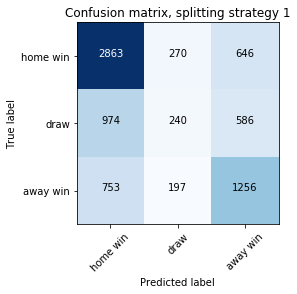

Confusion matrix, without normalization
[[1315   86  209]
 [ 431  103  266]
 [ 295  101  534]]


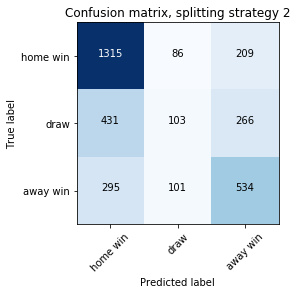

In [37]:

from sklearn.metrics import confusion_matrix
def decode(y):
    dec = [] 
    for i in range(len(y)):
        dec.append(np.argmax(y[i,:]))
    return np.asarray(dec)
    

y_pred= mod1.predict(X_validation)
y_pred_dec = decode(y_pred)
y_validation_dec = decode(y_validation)

cnf_matrix = confusion_matrix(y_validation_dec,y_pred_dec)

class_names = ['home win','draw','away win']
func.plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, splitting strategy 1')
plt.show()

y_pred2= mod2.predict(X_validation_red)
y_pred2_dec = decode(y_pred2)
y_validation2_dec = decode(y_validation_red)

cnf_matrix2 = confusion_matrix(y_validation2_dec,y_pred2_dec)

class_names = ['home win','draw','away win']
func.plot_confusion_matrix(cnf_matrix2, classes=class_names,
                      title='Confusion matrix, splitting strategy 2')




In [38]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
home_country = np.genfromtxt(path+ filename_2018, delimiter=",",dtype=(str,10), skip_header=1, encoding=None,usecols=[1])
away_country = np.genfromtxt(path+ filename_2018, delimiter=",",dtype=(str,10), skip_header=1, encoding=None,usecols=[2])

y_2018_proba = np.asarray(mod2.predict(X_2018))
y_2018 = decode(y_2018_proba)

for i in range (len(X_2018[:,0])): 
    if y_2018[i] == 0 : 
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : home win with probability " + str(y_2018_proba[i,0])) 
    elif y_2018[i] == 1 : 
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : draw with probability " + str(y_2018_proba[i,1])) 
    elif y_2018[i] == 2 : 
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : away win with probability " + str(y_2018_proba[i,2])) 

2018-06-14 : Russia vs Saudi Arab, predicted results : home win with probability 0.80472565
2018-06-15 : Egypt vs Uruguay, predicted results : away win with probability 0.627868
2018-06-15 : Morocco vs Iran, predicted results : away win with probability 0.44807667
2018-06-15 : Portugal vs Spain, predicted results : away win with probability 0.47041366
2018-06-16 : France vs Australia, predicted results : home win with probability 0.67091507
2018-06-16 : Argentina vs Iceland, predicted results : home win with probability 0.8844372
2018-06-16 : Peru vs Denmark, predicted results : away win with probability 0.50223386
2018-06-16 : Croatia vs Nigeria, predicted results : home win with probability 0.5174363
2018-06-17 : Costa Rica vs Serbia, predicted results : home win with probability 0.38929236
2018-06-17 : Germany vs Mexico, predicted results : home win with probability 0.5616181
2018-06-17 : Brazil vs Switzerlan, predicted results : home win with probability 0.67187554
2018-06-18 : Swe

In [39]:
#Now compute the expectation using the odds of the bookmakers : 
filename_odds = "data_odds_2018WC.csv"
odds = np.genfromtxt(path+ filename_odds, delimiter=",",dtype=(float,3), skip_header=1, encoding=None,usecols=[3,4,5])
odds = np.asarray(odds)
print(np.shape(odds))
print(np.shape(X_2018))

expectation = [] 

for i in range (len(X_2018[:,0])): 

    if y_2018[i] == 0 : 
        expectation.append(y_2018_proba[i,0]* odds[i,0])
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : home win, expectation :" + str(expectation[i]) ) 
    elif y_2018[i] == 1 : 
        expectation.append(y_2018_proba[i,1]*odds[i,1])
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : draw, expectation :" + str(expectation[i]) ) 
        
    elif y_2018[i] == 2 : 
        expectation.append(y_2018_proba[i,2]*odds[i,2])        
        print(date_2018[i] + " : " + str(home_country[i]) + " vs " + str(away_country[i])+ ", predicted results : away win, expectation :" + str(expectation[i]) ) 

(48, 3)
(48, 579)
2018-06-14 : Russia vs Saudi Arab, predicted results : home win, expectation :1.086379623413086
2018-06-15 : Egypt vs Uruguay, predicted results : away win, expectation :0.9983101147413255
2018-06-15 : Morocco vs Iran, predicted results : away win, expectation :1.6041144621372223
2018-06-15 : Portugal vs Spain, predicted results : away win, expectation :0.9173066273331641
2018-06-16 : France vs Australia, predicted results : home win, expectation :0.8252255326509476
2018-06-16 : Argentina vs Iceland, predicted results : home win, expectation :1.1939902245998384
2018-06-16 : Peru vs Denmark, predicted results : away win, expectation :1.0647357892990112
2018-06-16 : Croatia vs Nigeria, predicted results : home win, expectation :0.9727802920341491
2018-06-17 : Costa Rica vs Serbia, predicted results : home win, expectation :1.5844199025630952
2018-06-17 : Germany vs Mexico, predicted results : home win, expectation :0.8199624109268189
2018-06-17 : Brazil vs Switzerlan, p

In [30]:
odds_predicition = [np.argmin(odds[i,:]) for i in range(len(odds))]  #get the lowest odds as the favorite 
count = 0 
for i in range(len(odds)):
    if odds_predicition[i] != y_2018[i]: 
        print("Bookmaker odds and prediction disagree for the game : "+ str(home_country[i]) + " vs " + str(away_country[i]))
        count +=1 
        
print("algorithm gives expected result of the bookmaker in %2.2f percent of the cases "%(count/len(odds)*100))
        


Bookmaker odds and prediction disagree for the game : Morocco vs Iran
Bookmaker odds and prediction disagree for the game : Serbia vs Switzerlan
Bookmaker odds and prediction disagree for the game : Japan vs Senegal
Bookmaker odds and prediction disagree for the game : Poland vs Colombia
Bookmaker odds and prediction disagree for the game : England vs Belgium
algorithm gives expected result of the bookmaker in 10.42 percent of the cases 
